# 회귀예측 - 자전거 대여 수요 예측

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

In [2]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/bike-sharing/train.csv'
bike_df = pd.read_csv(csvFile)
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


In [4]:
# 컬럼들의 정보 확인
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# datetime 컬럼을 년, 월, 일 시간으로 분리
# 문자열을 datetime 타입으로 변경: 방법1
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [6]:
# datetime 컬럼의 데이터 타입 변경: 방법2
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [7]:
# 불필요한 컬럼 삭제
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

C:\Anaconda3\envs\pythonEx\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


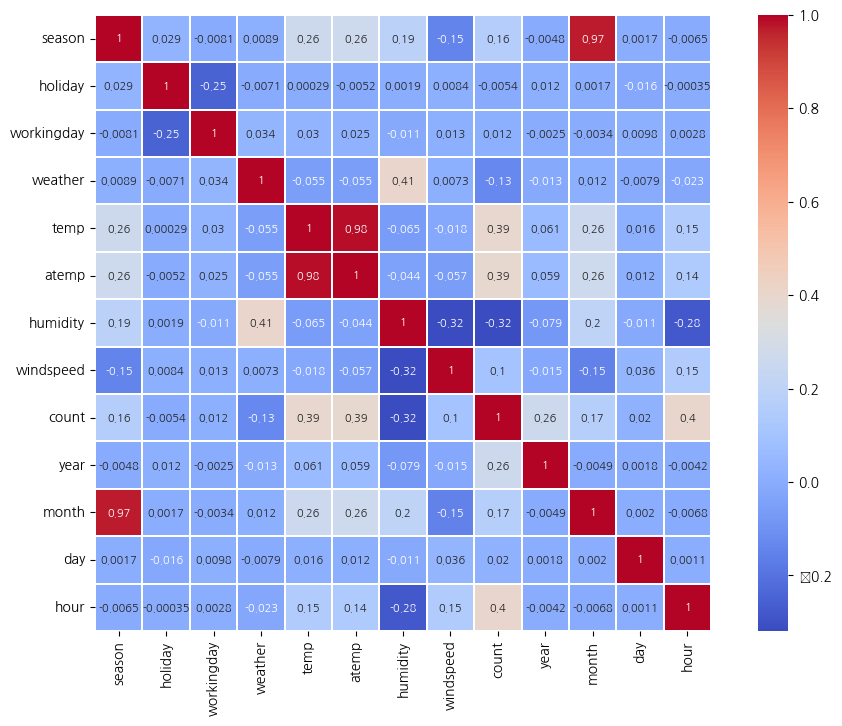

In [8]:
# 히트맵 확인을 위한 함수 생성
# 상관관계 지수 heatmap
def get_heatmap(data):
    
    colormap = plt.cm.coolwarm
    plt.figure(figsize = (12, 8))
    sns.heatmap(data.corr(), linewidths = 0.1, square = True, linecolor = 'white', annot = True, annot_kws = {'size': 8}, cmap = colormap)
get_heatmap(bike_df)

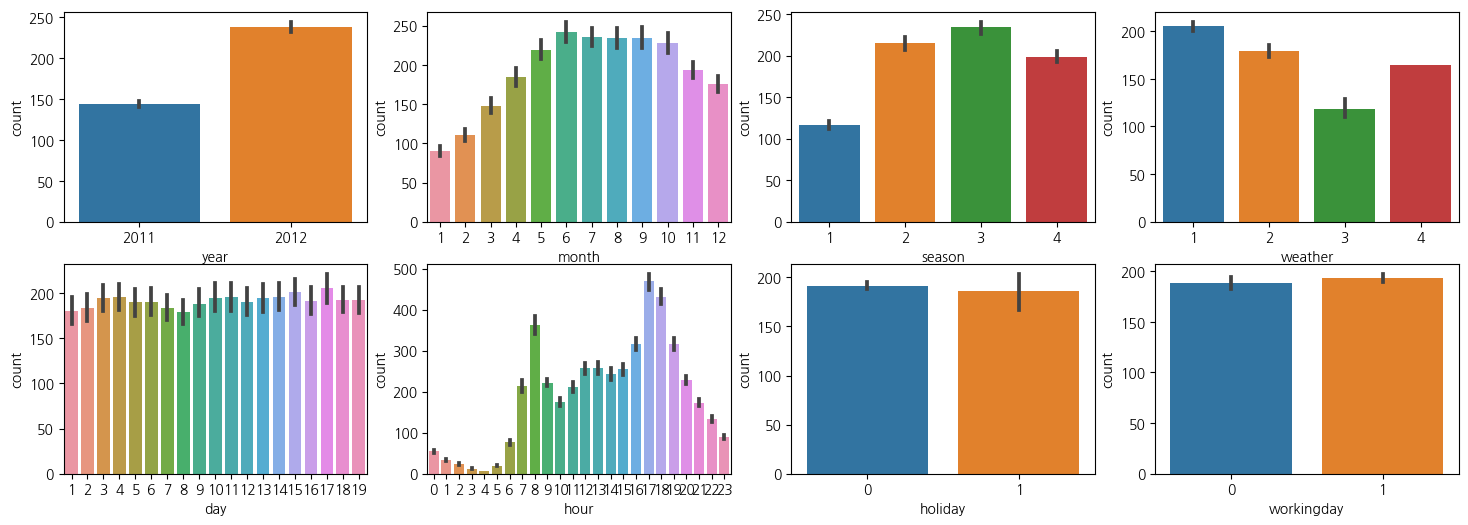

In [9]:
# 주요 칼럼별로 target값인 count(대여 횟수) 분포 확인
fig, axs = plt.subplots(figsize = (18, 6), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 컬럼별로 개별 컬럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i / 4)
    col = i % 4
    
    # seaborn의 barplot이용하여 칼럼값에 따른 count의 합 표현
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

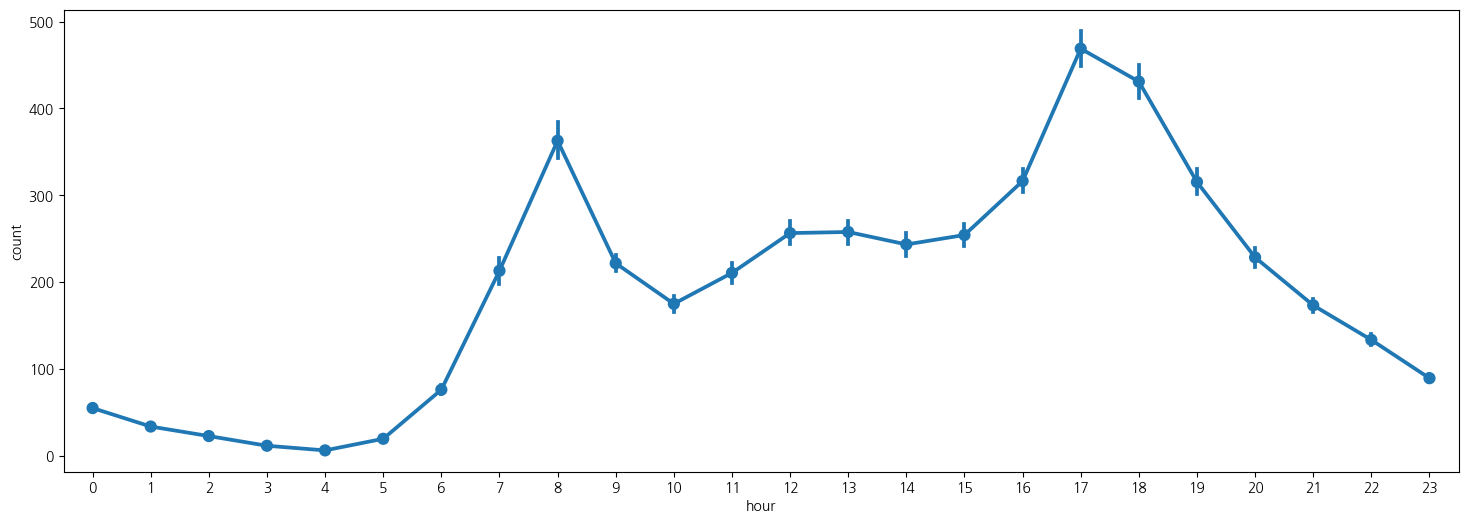

In [10]:
# 시간대별 대여횟수 point plot
fig, ax = plt.subplots(figsize = (18,6))
sns.pointplot(data = bike_df, x = 'hour', y = 'count', ax = ax)
plt.show()

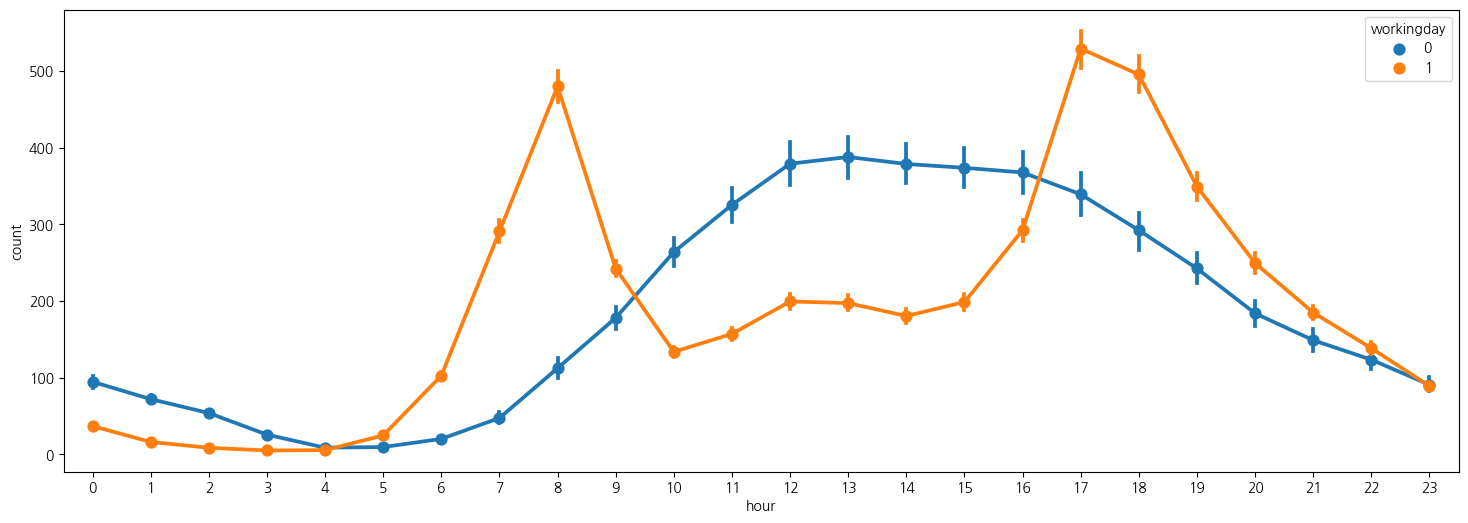

In [11]:
# workingday (카테고리형) , 시간대별로 point plot 확인
fig, ax = plt.subplots(figsize = (18,6))
sns.pointplot(data = bike_df, x = 'hour', y = 'count', hue = 'workingday', ax = ax)
plt.show()

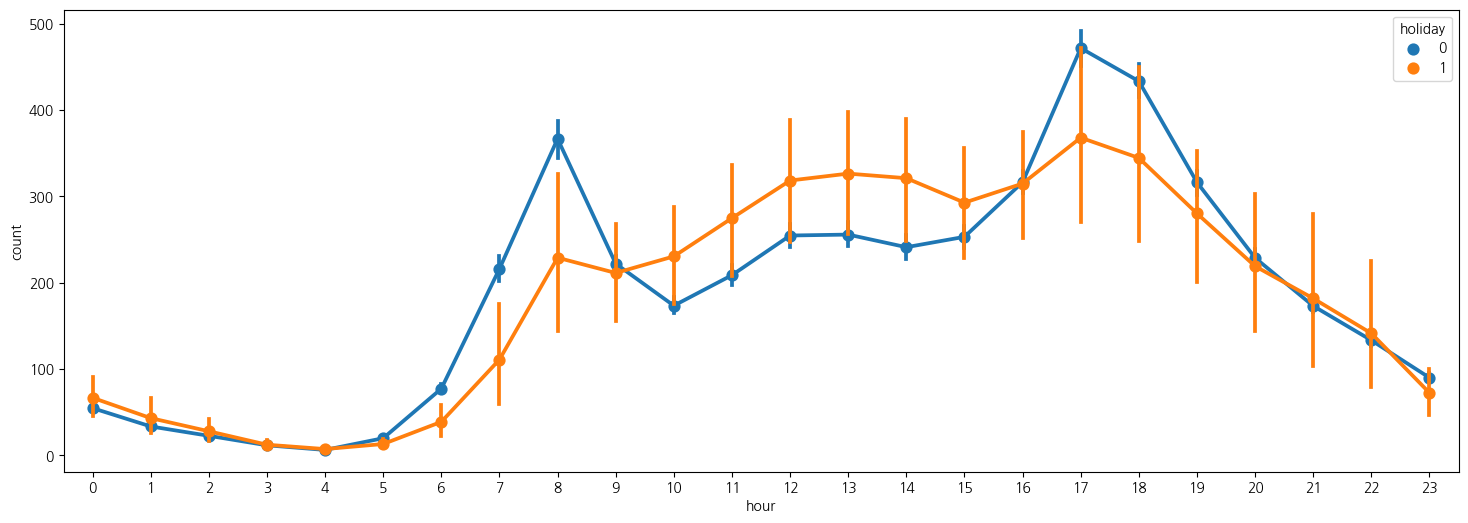

In [12]:
# holiday (카테고리형), 시간대별로 point plot 확인
fig, ax = plt.subplots(figsize = (18,6))
sns.pointplot(data = bike_df, x = 'hour', y = 'count', hue = 'holiday', ax = ax)
plt.show()

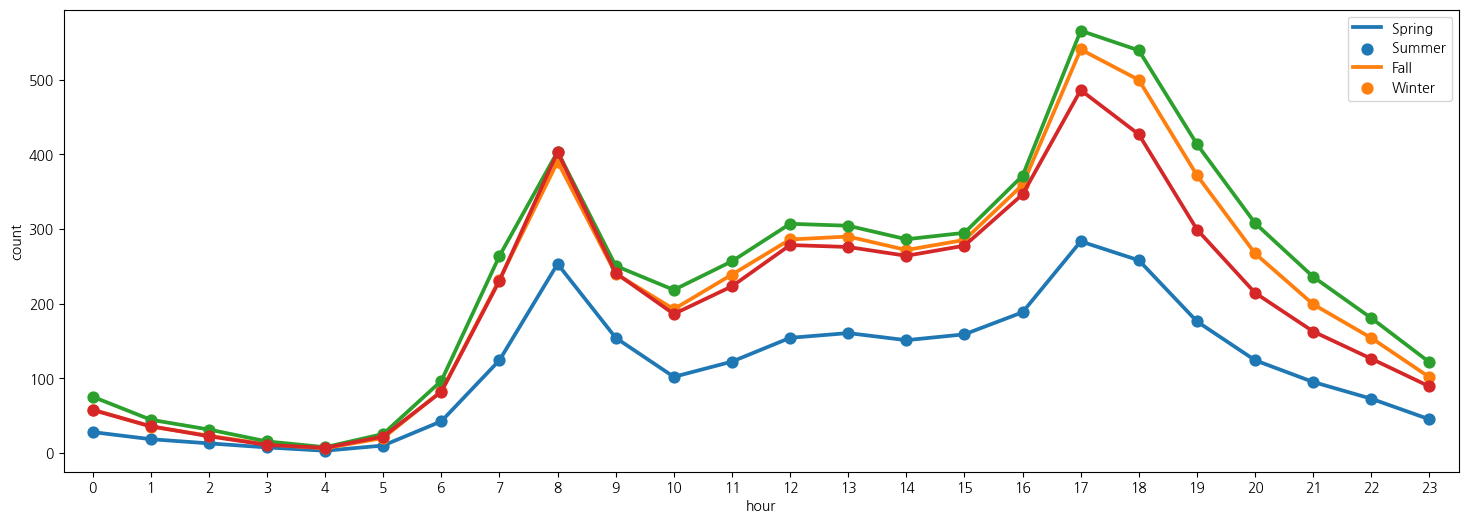

In [13]:
# season(카데고리형), 시간대별로 point plot 확인
fig, ax = plt.subplots(figsize = (18,6))
sns.pointplot(data = bike_df, x = 'hour', y = 'count', hue = 'season', ax = ax, errorbar = None)
labels=['Spring', 'Summer', 'Fall', 'Winter']
ax.legend(labels = labels)
plt.show()

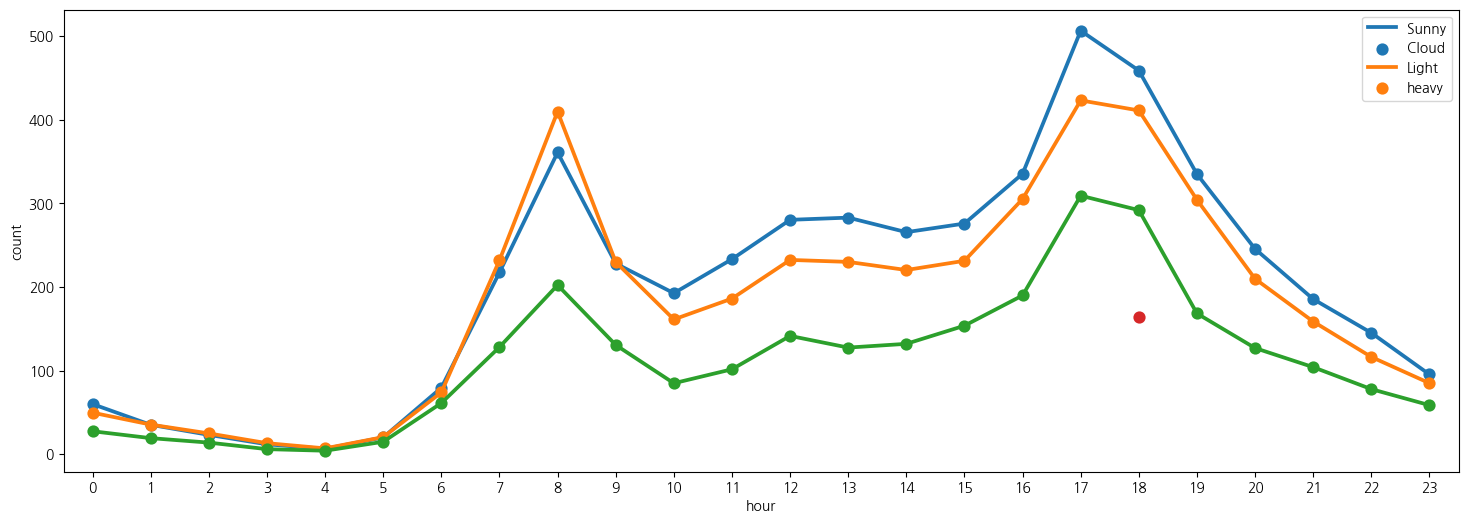

In [14]:
# weather(카데고리형), 시간대별로 point plot 확인
fig, ax = plt.subplots(figsize = (18,6))
sns.pointplot(data = bike_df, x = 'hour', y = 'count', hue = 'weather', ax = ax, errorbar=None)
labels=['Sunny', 'Cloud', 'Light', 'heavy']
ax.legend(labels=labels)
 
plt.show()

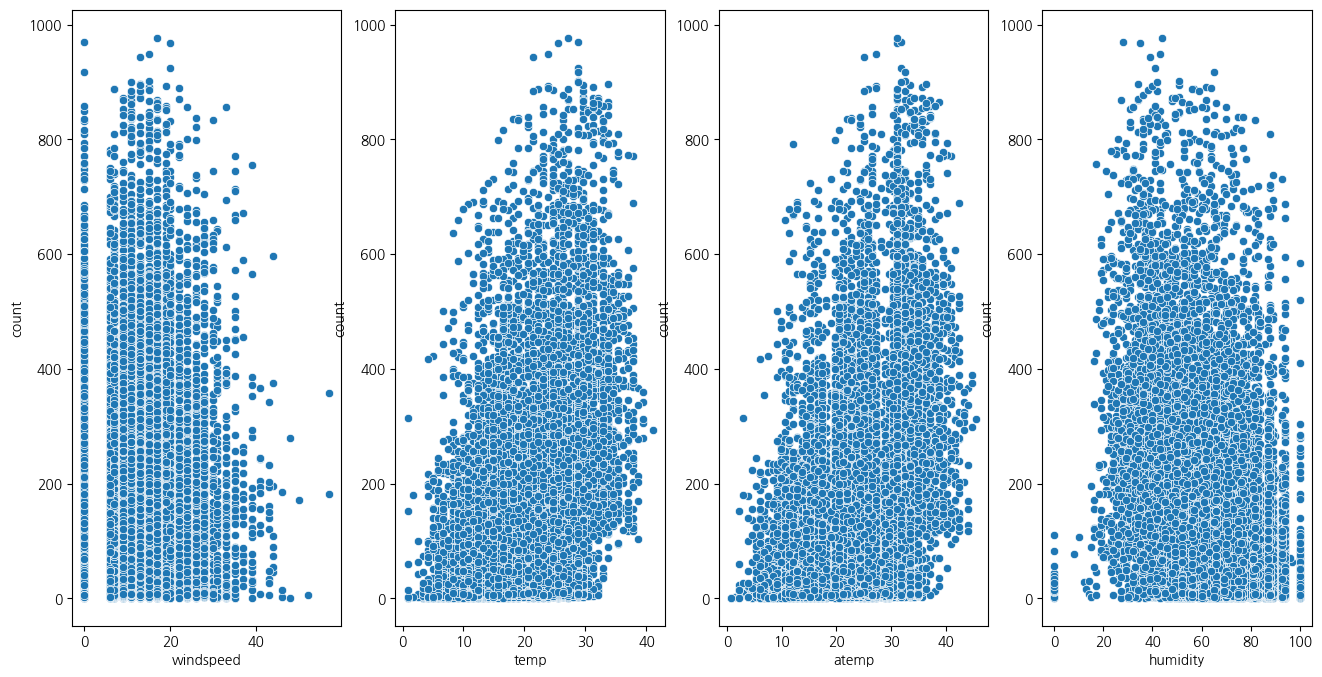

In [15]:
# 온도, 습도, 바람세기에 대해서 살펴보기
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (16, 8), ncols = 4)

sns.scatterplot(data = bike_df, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = bike_df, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = bike_df, x = 'atemp', y = 'count', ax = ax3)
sns.scatterplot(data = bike_df, x = 'humidity', y = 'count', ax = ax4)
plt.show()

In [16]:
# 회귀모델을 데이터 세트에 적용하여 예측성능 측정
# RMSLE 사용
from sklearn.metrics import mean_squared_error, mean_absolute_error
# log값 변환 시 NaN등의 이슈로  log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [17]:
# 선형회귀를 이용하여 회귀예측
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_data = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


실제값과 예측값이 어느 정도 차이가 나는지 dataframe의 칼럼으로 만들어서 오류값이 가장 큰 순으로 5개 확인

In [18]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
get_top_error_data(y_test, pred, n_tops = 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

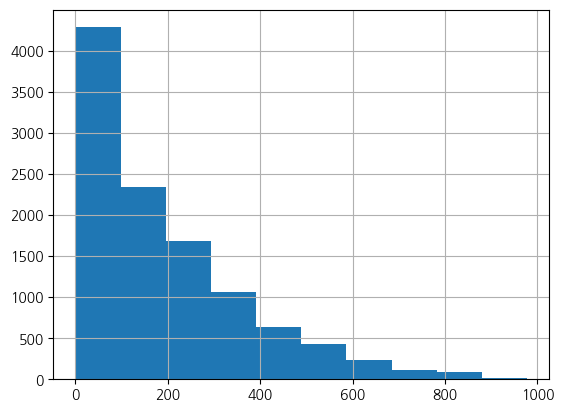

In [19]:
# target값인 count컬럼이 정규분포를 이루는지 확인
y_target.hist()

<Axes: >

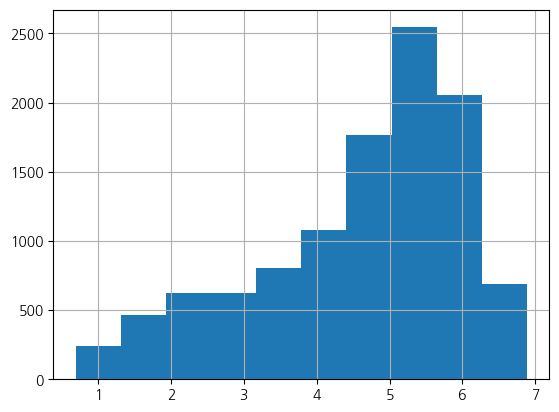

In [20]:
# 로그변환 후 히스토그램 확인
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [21]:
# 타깃컴럼인 count값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그변환된 y_target_log를 반영해 학습/테스트 데이터 세트
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 target값은 로그 변환 되었으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


* RMSLE오류는 줄어들었지만, RMSE는 오히려 더 늘어났다. 따라서 개별 피처들의 인코딩을 적용해 보고자 한다. 각 피처의 회귀 계숫값을 시각화해본다.

<Axes: >

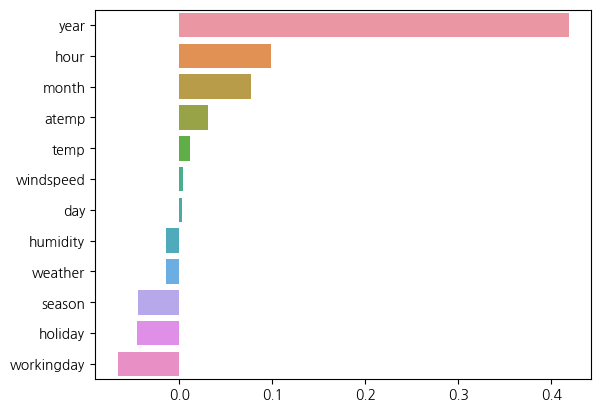

In [22]:
# 개별 피처들의 인코딩 적용
coef = pd.Series(lr_reg.coef_, index = X_data.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [23]:
# 'year', 'month', 'day', 'hour' 등의 피처들을 원핫인코딩으로 변환해준다
X_data_ohe = pd.get_dummies(X_data, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [24]:
# 원-핫 인코딩이 적용된 피터데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_data_ohe, y_target_log, test_size = 0.3, random_state = 0)


# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)
    
    # end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

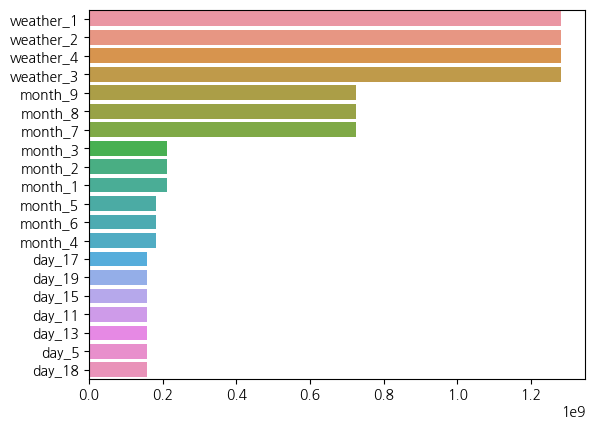

In [25]:
# 원-핫 인코딩된 데이터 세트에서 회귀계수가 높은 피처를 다시 시각화
coef = pd.Series(lr_reg.coef_, index = X_data_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [26]:
# 회귀 트리 이용하여 회귀에측 수행
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 Dataframe이 입력될 경우 버전에 따라 오류 발생 가능, ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1 = True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.026, MAE: 31.030
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.327, MAE: 32.732
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
